<a href="https://colab.research.google.com/github/Angel-style/Final-project/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import bibliotek
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import model_selection
import datetime
from pprint import pprint
from sklearn import ensemble
from sklearn import model_selection
from sklearn import pipeline

In [ ]:
#strony 55

wynik = [ [
             "strona_oferty",
             "id_oferty",
             "tytul",
             "link",
             "cena",
             "rocznik",
           "pojemnosc_silnika",
             "przebieg",
             "paliwo",
             "miniaturka_url"] ]

for n in range(1, 56):
    URL_strony = "https://www.otomoto.pl/osobowe/dacia/od-2015" + "?page=" + str(n)
    print(URL_strony)
    strona = requests.get(URL_strony) 
    html_strony = strona.content
    strona_oferty = n
    # tworzenie obiektu BeautifulSoup
    dane_wstepne = BeautifulSoup(html_strony, "lxml")
    dacia = dane_wstepne.find_all("article", {"data-testid":"listing-ad"})

    for dane in dacia:
      id_oferty = dane.get("id", None)
      if id_oferty == None:
        continue
      else:
        tytul = dane.find("a", {"target":"_self"}).text.strip()
        link = dane.find("a").get("href").strip()
        if "carsmile.pl" in link:
          continue
        cena = dane.find("span", {"class": "ooa-1bmnxg7 e1p19lg711"}).text.strip().split(" PLN")
        cena = cena[0]
        lista = []
        dane_rocznik_przebieg_paliwo = dane.find_all("li", {"class":"ooa-1k7nwcr e19ivbs0"})
  
        for a in dane_rocznik_przebieg_paliwo[:4]:
          a = str(a)
          a = a[33:-5]
          lista.append(a)
    
        if len(lista) > 0:
          rocznik = lista[0]
          przebieg = lista[2]
          pojemnosc_silnika = lista[1]
          paliwo = lista[3]
        else:
          rocznik = np.NaN
          przebieg = np.NaN
          pojemnosc_silnika = np.NaN
          paliwo = np.NaN

        miniaturka_url = np.NaN if dane.find("img", {"loading": "lazy"})==None else dane.find("img", {"loading": "lazy"}).get("src")

        wynik.append([strona_oferty,
             id_oferty,
             tytul,
             link,
             cena,
             rocznik,
             przebieg,
             pojemnosc_silnika,
             paliwo,
             miniaturka_url])
dane_finalne = pd.DataFrame(wynik[1:], columns=wynik[0])

https://www.otomoto.pl/osobowe/dacia/od-2015?page=1
https://www.otomoto.pl/osobowe/dacia/od-2015?page=2
https://www.otomoto.pl/osobowe/dacia/od-2015?page=3
https://www.otomoto.pl/osobowe/dacia/od-2015?page=4
https://www.otomoto.pl/osobowe/dacia/od-2015?page=5
https://www.otomoto.pl/osobowe/dacia/od-2015?page=6
https://www.otomoto.pl/osobowe/dacia/od-2015?page=7
https://www.otomoto.pl/osobowe/dacia/od-2015?page=8
https://www.otomoto.pl/osobowe/dacia/od-2015?page=9
https://www.otomoto.pl/osobowe/dacia/od-2015?page=10
https://www.otomoto.pl/osobowe/dacia/od-2015?page=11
https://www.otomoto.pl/osobowe/dacia/od-2015?page=12
https://www.otomoto.pl/osobowe/dacia/od-2015?page=13
https://www.otomoto.pl/osobowe/dacia/od-2015?page=14
https://www.otomoto.pl/osobowe/dacia/od-2015?page=15
https://www.otomoto.pl/osobowe/dacia/od-2015?page=16
https://www.otomoto.pl/osobowe/dacia/od-2015?page=17
https://www.otomoto.pl/osobowe/dacia/od-2015?page=18
https://www.otomoto.pl/osobowe/dacia/od-2015?page=19
ht

In [ ]:
dane_finalne.to_csv("dacia.csv", index=False)

In [ ]:
dane = pd.read_csv("dacia.csv")

In [ ]:
#usuniecie wierszy z EUR
dane = dane.drop(dane[(dane.id_oferty == 6106489146)].index)
dane = dane.drop(dane[(dane.id_oferty == 6106046592)].index)

In [ ]:
dane["cena"] = dane["cena"].str.replace(" ", "")
dane["cena"] = dane["cena"].astype(int)

In [ ]:
dane["rocznik"].value_counts(dropna=False)

2022              376
2018              232
2019              227
2021              159
2017              158
2016              142
2015              115
2020              107
2023               93
Niski przebieg      9
Name: rocznik, dtype: int64

In [ ]:
dane = dane.drop(dane[(dane.rocznik == "Niski przebieg")].index)

In [ ]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609 entries, 0 to 1619
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   strona_oferty      1609 non-null   int64 
 1   id_oferty          1609 non-null   int64 
 2   tytul              1609 non-null   object
 3   link               1609 non-null   object
 4   cena               1609 non-null   int64 
 5   rocznik            1609 non-null   int64 
 6   przebieg           1572 non-null   object
 7   pojemnosc_silnika  1609 non-null   object
 8   paliwo             1609 non-null   object
 9   miniaturka_url     935 non-null    object
dtypes: int64(4), object(6)
memory usage: 138.3+ KB


In [ ]:
dane["rocznik"] = dane["rocznik"].astype(int)

In [ ]:
dane["przebieg_jednostka"] = dane["przebieg"].str[-3:]
dane["przebieg_jednostka"] = dane["przebieg_jednostka"].str.replace(" ", "")

In [ ]:
dane["przebieg"].value_counts()

5 km          145
1 km          133
10 km          97
4 km           12
60 000 km      10
             ... 
47 029 km       1
106 550 km      1
81 080 km       1
42 991 km       1
114 532 km      1
Name: przebieg, Length: 884, dtype: int64

In [ ]:
dane = dane.drop(dane[(dane.przebieg_jednostka == "cm3")].index)

In [ ]:
dane["przebieg"] = dane["przebieg"].str.rstrip(" km")

In [ ]:
dane["przebieg"] = dane["przebieg"].str.replace(" ", "")


In [ ]:
dane["przebieg"] = dane["przebieg"].astype(int)

In [ ]:
dane["pojemnosc_silnika_jednostka"] = dane["pojemnosc_silnika"].str[-3:]

In [ ]:
dane["pojemnosc_silnika_jednostka"].value_counts()

cm3    1572
Name: pojemnosc_silnika_jednostka, dtype: int64

In [ ]:
dane["pojemnosc_silnika"].value_counts(dropna=False)

999 cm3      600
1 598 cm3    286
1 461 cm3    245
898 cm3      125
1 332 cm3    105
1 197 cm3     58
1 333 cm3     48
1 149 cm3     40
NaN           34
998 cm3       34
1 000 cm3      8
1 198 cm3      6
1 500 cm3      5
1 300 cm3      5
1 199 cm3      4
1 600 cm3      2
900 cm3        1
Name: pojemnosc_silnika, dtype: int64

In [ ]:
#Wykorzystanie mody przy pojemności silnika =1
print("Moda: ", dane["pojemnosc_silnika"].mode())
moda = float(dane["pojemnosc_silnika"].mode().values)
dane["pojemnosc_silnika"] = dane["pojemnosc_silnika"].replace(1, moda)

Moda:  0    999.0
dtype: float64


In [ ]:
print("Moda: ", dane["pojemnosc_silnika"].mode())
moda = float(dane["pojemnosc_silnika"].mode().values)
# podmiana NaN na modę
dane["pojemnosc_silnika"] = dane["pojemnosc_silnika"].fillna(moda)
dane["pojemnosc_silnika"].value_counts(dropna=False)

Moda:  0    999.0
dtype: float64


999.0     634
1598.0    286
1461.0    245
898.0     125
1332.0    105
1197.0     58
1.0        48
1149.0     40
998.0      34
1000.0      8
1198.0      6
1500.0      5
1300.0      5
1199.0      4
1600.0      2
900.0       1
Name: pojemnosc_silnika, dtype: int64

In [ ]:
dane["pojemnosc_silnika"].value_counts(dropna=False)

999.0     682
1598.0    286
1461.0    245
898.0     125
1332.0    105
1197.0     58
1149.0     40
998.0      34
1000.0      8
1198.0      6
1500.0      5
1300.0      5
1199.0      4
1600.0      2
900.0       1
Name: pojemnosc_silnika, dtype: int64

In [ ]:
dane["pojemnosc_silnika"] = dane["pojemnosc_silnika"].str.rstrip(" cm3")
dane["pojemnosc_silnika"] = dane["pojemnosc_silnika"].str.replace(" ", "")


In [ ]:
dane["pojemnosc_silnika"] = dane["pojemnosc_silnika"].astype(float)

In [ ]:
#zapisanie obrobionych danych
dane.to_csv("daciaostateczna.csv", index=False)

In [ ]:
dane = print("Moda: ", dane["pojemnosc_silnika"].mode())
moda = float(dane["pojemnosc_silnika"].mode().values)
dane["pojemnosc_silnika"] = dane["pojemnosc_silnika"].replace(1, moda)
# podmiana NaN na modę
dane["pojemnosc_silnika"] = dane["pojemnosc_silnika"].fillna(moda)
dane["przebieg"].value_counts(dropna=False)

In [ ]:
dane["przebieg"].value_counts(dropna=False)

5         145
1         133
10         97
4          12
60000      10
         ... 
47029       1
106550      1
81080       1
42991       1
114532      1
Name: przebieg, Length: 883, dtype: int64

In [ ]:
moda_przebieg = float(dane["przebieg"].mode().values)
moda_przebieg

5.0

In [ ]:
dane = pd.read_csv("daciaostateczna.csv")
dane

,strona_oferty,id_oferty,tytul,link,cena,rocznik,pojemnosc_silnika,przebieg,paliwo,miniaturka_url,przebieg_jednostka,pojemnosc_silnika_jednostka
0,1,6106844822,Dacia Sandero Stepway,https://www.otomoto.pl/oferta/dacia-sandero-st...,67700,2021,999.0,18500,Benzyna+LPG,https://ireland.apollo.olxcdn.com/v1/files/eyJ...,km,cm3
1,1,6105589671,Dacia Duster 1.5 dCi Open EU6,https://www.otomoto.pl/oferta/dacia-duster-sal...,28500,2017,1461.0,299000,Diesel,https://ireland.apollo.olxcdn.com/v1/files/eyJ...,km,cm3
2,1,6106843546,Dacia Duster 1.5 dCi Prestige,https://www.otomoto.pl/oferta/dacia-duster-1-s...,59999,2018,1461.0,130000,Diesel,https://ireland.apollo.olxcdn.com/v1/files/eyJ...,km,cm3
3,1,6103687192,Dacia Duster 1.5 dCi Ambiance,https://www.otomoto.pl/oferta/dacia-duster-sal...,40999,2016,1461.0,128600,Diesel,https://ireland.apollo.olxcdn.com/v1/files/eyJ...,km,cm3
4,1,6106506598,Dacia Duster 1.0 TCe Access,https://www.otomoto.pl/oferta/dacia-duster-kra...,54900,2021,999.0,92800,Benzyna+LPG,NaN,km,cm3
...,...,...,...,...,...,...,...,...,...,...,...,...
1601,55,6103196188,Dacia Duster,https://www.otomoto.pl/oferta/dacia-duster-1-6...,45000,2015,1598.0,77710,Benzyna+LPG,NaN,km,cm3
1602,55,6100396634,Dacia Logan,https://www.otomoto.pl/oferta/dacia-logan-daci...,23900,2016,1149.0,299500,Benzyna+LPG,NaN,km,cm3
1603,55,6100469517,Dacia Dokker Van,https://www.otomoto.pl/oferta/dacia-dokker-van...,38500,2018,1598.0,29900,Benzyna,NaN,km,cm3
1604,55,6101140550,Dacia Duster,https://www.otomoto.pl/oferta/dacia-duster-ope...,43900,2016,1598.0,114532,Benzyna+LPG,https://ireland.apollo.olxcdn.com/v1/files/eyJ...,km,cm3


In [ ]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606 entries, 0 to 1605
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   strona_oferty                1606 non-null   int64  
 1   id_oferty                    1606 non-null   int64  
 2   tytul                        1606 non-null   object 
 3   link                         1606 non-null   object 
 4   cena                         1606 non-null   int64  
 5   rocznik                      1606 non-null   int64  
 6   pojemnosc_silnika            1606 non-null   float64
 7   przebieg                     1606 non-null   int64  
 8   paliwo                       1606 non-null   object 
 9   miniaturka_url               932 non-null    object 
 10  przebieg_jednostka           1606 non-null   object 
 11  pojemnosc_silnika_jednostka  1572 non-null   object 
dtypes: float64(1), int64(5), object(6)
memory usage: 150.7+ KB


In [ ]:
#średnia cena względem rodzaju paliwa
dane.groupby("paliwo").agg(dict(cena = "mean")).sort_values(by = "cena", ascending = False)

,cena
paliwo,
Elektryczny,88608.205882
Benzyna+CNG,77100.000000
Benzyna+LPG,69064.907801
Benzyna,56810.752508
Diesel,46234.520000


In [ ]:

px.box(dane, 
       x = "paliwo", 
       y = "cena", 
       notched = True, 
       facet_col = "rocznik",
       title = "Cena samochodu pod względem rodzaju paliwa i rocznika") 

In [ ]:
px.histogram(dane, 
             x = "przebieg", 
             y= "cena", 
             color = "paliwo",
             marginal = "violin")

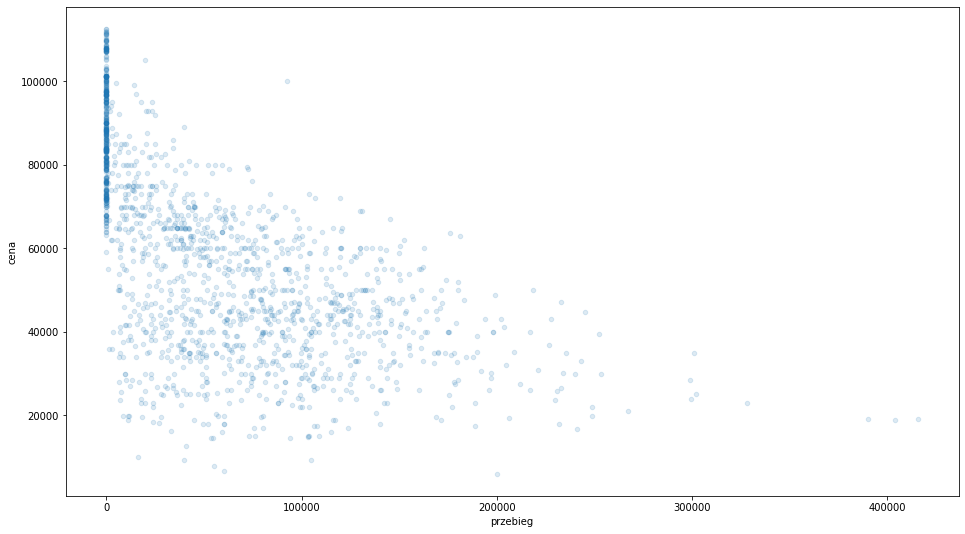

In [ ]:

matplotlib.rcParams["figure.figsize"] = (16,9)

dane.plot(kind = "scatter", 
               x = "przebieg",
               y = "cena",
               alpha = .15);

In [ ]:
#modelowanie - wybranie zmiennych
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


cechy_do_modelowania = ["cena", "rocznik", "przebieg", "paliwo", "pojemnosc_silnika"]
dane_modelowanie = dane[cechy_do_modelowania]
dane_modelowanie

,cena,rocznik,przebieg,paliwo,pojemnosc_silnika
0,67700,2021,18500,Benzyna+LPG,999.0
1,28500,2017,299000,Diesel,1461.0
2,59999,2018,130000,Diesel,1461.0
3,40999,2016,128600,Diesel,1461.0
4,54900,2021,92800,Benzyna+LPG,999.0
...,...,...,...,...,...
1601,45000,2015,77710,Benzyna+LPG,1598.0
1602,23900,2016,299500,Benzyna+LPG,1149.0
1603,38500,2018,29900,Benzyna,1598.0
1604,43900,2016,114532,Benzyna+LPG,1598.0


In [ ]:
#szuaknie wartości odstających
px.box(dane_modelowanie, x = "cena", title = "Rozrzut cechy - cena", orientation = "h")

In [ ]:
px.box(dane_modelowanie, x = "pojemnosc_silnika", title = "Rozrzut cechy - pojemność silnika", orientation = "h")

In [ ]:
px.box(dane_modelowanie, x = "przebieg", title = "Rozrzut cechy - przebieg", orientation = "h")

In [ ]:
def IQR_outliers_pojemnosc_silnika(a):
  Q1, Q3 = np.percentile(a, [25, 75])
  IQR = Q3 - Q1

  gorne_ograniczenie  = Q3 + (2 * IQR)
  dolne_ograniczenie  = Q1 - (2 * IQR)
  print("Górne ograniczenie:", gorne_ograniczenie)
  print("Dolne ograniczenie:", dolne_ograniczenie)

  indeksy = np.where((a > gorne_ograniczenie) | (a < dolne_ograniczenie))
  b = np.full(shape=a.shape[0], fill_value=1)
  b[indeksy] = -1
  
  return b

In [ ]:


# użycie funkcji
dane_modelowanie["flaga_IQR"] = IQR_outliers_pojemnosc_silnika(dane_modelowanie["pojemnosc_silnika"])
print(dane_modelowanie["flaga_IQR"])

# wizualizacja wartości odstających wg. pojemności silnika
px.scatter(dane_modelowanie, 
           x = "cena", 
           y = "pojemnosc_silnika",
           hover_name = "rocznik",
           color = "flaga_IQR", 
           title = "Rozrzut cechy - pojemność_silnika a wartości odstające")

Górne ograniczenie: 2385.0
Dolne ograniczenie: 75.0
0       1
1       1
2       1
3       1
4       1
       ..
1601    1
1602    1
1603    1
1604    1
1605    1
Name: flaga_IQR, Length: 1606, dtype: int64


<ipython-input-12-d7acb78a8657>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dane_modelowanie.shape

(1606, 6)

In [ ]:
dane_modelowanie2 = dane_modelowanie[dane_modelowanie["flaga_IQR"]==1]
dane_modelowanie2.shape

(1606, 6)

In [ ]:
def IQR_outliers_przebieg(a):
  Q1, Q3 = np.percentile(a, [25, 75])
  IQR = Q3 - Q1

  gorne_ograniczenie  = Q3 + (2 * IQR)
  dolne_ograniczenie  = Q1 - (2 * IQR)
  print("Górne ograniczenie:", gorne_ograniczenie)
  print("Dolne ograniczenie:", dolne_ograniczenie)

  indeksy = np.where((a > gorne_ograniczenie) | (a < dolne_ograniczenie))
  b = np.full(shape=a.shape[0], fill_value=1)
  b[indeksy] = -1
  
  return b


dane_modelowanie["flaga_IQR"] = IQR_outliers_przebieg(dane_modelowanie["przebieg"])
print(dane_modelowanie["flaga_IQR"])

# wizualizacja wartości odstających wg. pojemności silnika
px.scatter(dane_modelowanie, 
           x = "cena", 
           y = "przebieg",
           hover_name = "rocznik",
           color = "flaga_IQR", 
           title = "Rozrzut cechy - przebieg a wartości odstające")

Górne ograniczenie: 274947.25
Dolne ograniczenie: -183281.5
0       1
1      -1
2       1
3       1
4       1
       ..
1601    1
1602   -1
1603    1
1604    1
1605    1
Name: flaga_IQR, Length: 1606, dtype: int64


<ipython-input-16-76fe190283cc>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dane_modelowanie2 = dane_modelowanie[dane_modelowanie["flaga_IQR"]==1]
dane_modelowanie2.shape

(1598, 6)

In [ ]:
def IQR_outliers_cena(a):
  Q1, Q3 = np.percentile(a, [25, 75])
  IQR = Q3 - Q1

  gorne_ograniczenie  = Q3 + (0.5 * IQR)
  dolne_ograniczenie  = Q1 - (1.5 * IQR)
  print("Górne ograniczenie:", gorne_ograniczenie)
  print("Dolne ograniczenie:", dolne_ograniczenie)

  indeksy = np.where((a > gorne_ograniczenie) | (a < dolne_ograniczenie))
  b = np.full(shape=a.shape[0], fill_value=1)
  b[indeksy] = -1
  
  return b

In [ ]:
dane_modelowanie2["flaga_IQR"] = IQR_outliers_cena(dane_modelowanie2["cena"])
print(dane_modelowanie2["flaga_IQR"])

# wizualizacja wartości odstających wg. ceny samochodu
px.scatter(dane_modelowanie2, 
           x = "przebieg", 
           y = "cena",
           hover_name = "rocznik",
           color = "flaga_IQR", 
           title = "Rozrzut cechy - cena a wartości odstające")

Górne ograniczenie: 95350.5
Dolne ograniczenie: -15352.5
0       1
2       1
3       1
4       1
5       1
       ..
1600    1
1601    1
1603    1
1604    1
1605    1
Name: flaga_IQR, Length: 1598, dtype: int64


<ipython-input-24-c61efb037acd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dane_modelowanie3 = dane_modelowanie2[dane_modelowanie2["flaga_IQR"]==1]
dane_modelowanie3.shape

(1451, 6)

In [ ]:
dane_modelowanie3.drop(columns = ["flaga_IQR"], inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



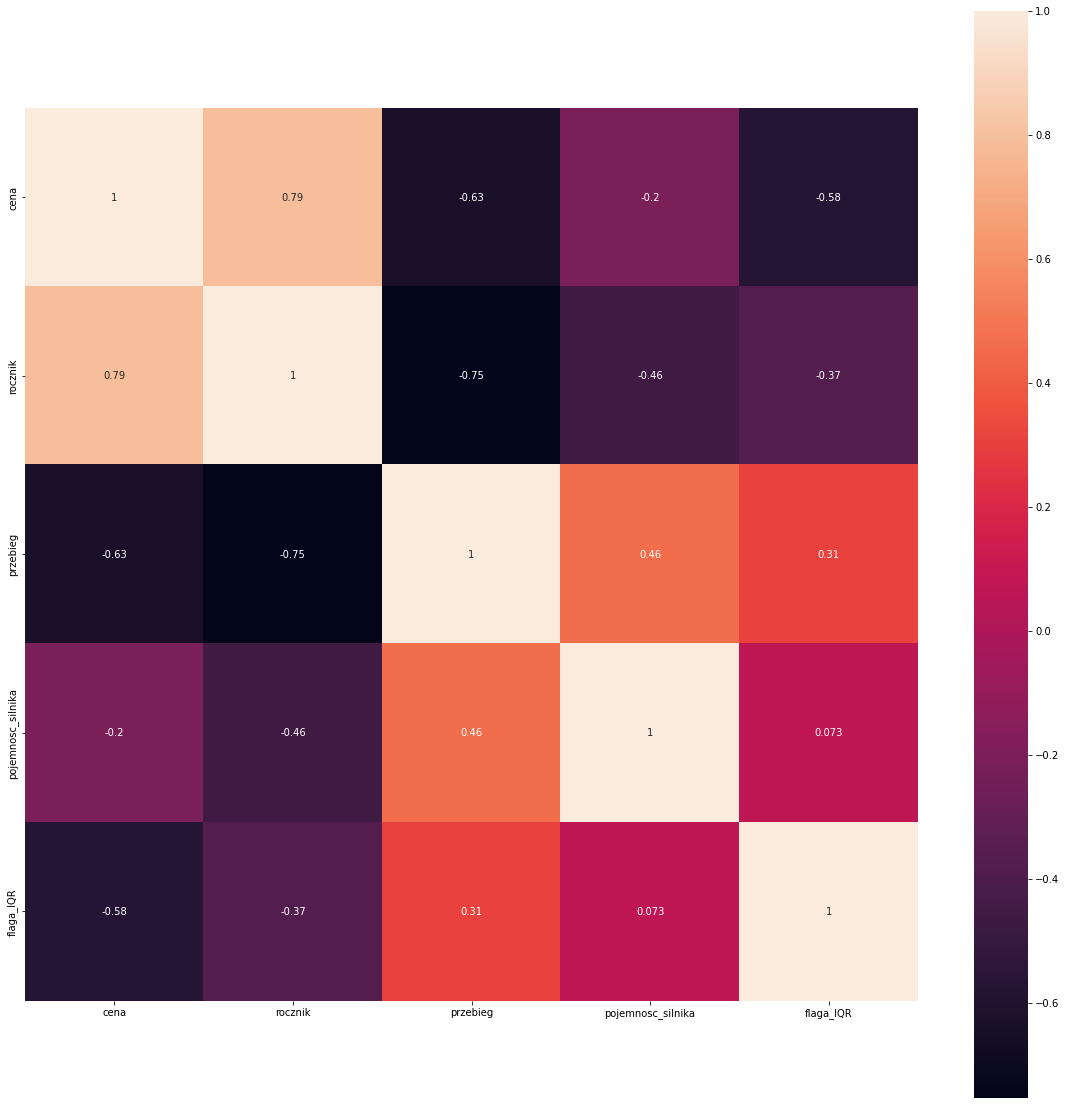

In [ ]:
# sprawdzenie korelacji między zmiennymi
korelacja = dane_modelowanie2.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(korelacja, square = True, annot = True);

In [ ]:
dane_modelowanie3["paliwo"].value_counts()

Benzyna        824
Benzyna+LPG    374
Diesel         238
Elektryczny     13
Benzyna+CNG      2
Name: paliwo, dtype: int64

In [ ]:
dane_modelowanie4 = dane_modelowanie3[dane_modelowanie3["paliwo"]!="Benzyna+CNG"]

In [ ]:
# dodanie zmiennej wiek samochodu na podstawie zmiennej przedziałowej oferta_rocznik
dane_modelowanie4["wiek"] = datetime.datetime.now().year - dane_modelowanie4["rocznik"]
dane_modelowanie4

<ipython-input-31-099f3cb81213>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cena,rocznik,przebieg,paliwo,pojemnosc_silnika,wiek
0,67700,2021,18500,Benzyna+LPG,999.0,2
2,59999,2018,130000,Diesel,1461.0,5
3,40999,2016,128600,Diesel,1461.0,7
4,54900,2021,92800,Benzyna+LPG,999.0,2
5,83700,2022,1,Benzyna+LPG,999.0,1
...,...,...,...,...,...,...
1600,37900,2019,12600,Benzyna,999.0,4
1601,45000,2015,77710,Benzyna+LPG,1598.0,8
1603,38500,2018,29900,Benzyna,1598.0,5
1604,43900,2016,114532,Benzyna+LPG,1598.0,7


In [ ]:
# tworzenie 3 kategorii na podstawie zakresu lat produkcji aut 
# (mean-odch.std, mean, mean+odch.std)
lista_rocznikow = dane_modelowanie3["rocznik"].unique().tolist()
print("Lista roczników: ", lista_rocznikow)
print("Średnia z rocznika:", int(np.mean(lista_rocznikow)), "oraz odchylenie standardowe rocznika:", int(np.std(lista_rocznikow)), sep=" ", end="\n")
zakresy_lat_produkcji = np.digitize(dane_modelowanie4["rocznik"], 
                                    bins=[int(np.mean(lista_rocznikow) - np.std(lista_rocznikow)),
                                          int(np.mean(lista_rocznikow)), 
                                          int(np.mean(lista_rocznikow) + np.std(lista_rocznikow))])
# dodanie kategorii
dane_modelowanie4["zakresy_lat_produkcji"] = zakresy_lat_produkcji

Lista roczników:  [2021, 2018, 2016, 2022, 2023, 2017, 2019, 2020, 2015]
Średnia z rocznika: 2019 oraz odchylenie standardowe rocznika: 2


<ipython-input-32-b5f90f1a69d8>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# usuwanie rocznik ze zbioru danych
dane_modelowanie4.drop(columns=["rocznik"], inplace=True)
dane_modelowanie4

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,cena,przebieg,paliwo,pojemnosc_silnika,wiek,zakresy_lat_produkcji
0,67700,18500,Benzyna+LPG,999.0,2,3
2,59999,130000,Diesel,1461.0,5,1
3,40999,128600,Diesel,1461.0,7,1
4,54900,92800,Benzyna+LPG,999.0,2,3
5,83700,1,Benzyna+LPG,999.0,1,3
...,...,...,...,...,...,...
1600,37900,12600,Benzyna,999.0,4,2
1601,45000,77710,Benzyna+LPG,1598.0,8,0
1603,38500,29900,Benzyna,1598.0,5,1
1604,43900,114532,Benzyna+LPG,1598.0,7,1


In [ ]:
dane_modelowanie5 = pd.get_dummies(dane_modelowanie4, columns=["paliwo", "zakresy_lat_produkcji"], prefix_sep="_")
dane_modelowanie5

,cena,przebieg,pojemnosc_silnika,wiek,paliwo_Benzyna,paliwo_Benzyna+LPG,paliwo_Diesel,paliwo_Elektryczny,zakresy_lat_produkcji_0,zakresy_lat_produkcji_1,zakresy_lat_produkcji_2,zakresy_lat_produkcji_3
0,67700,18500,999.0,2,0,1,0,0,0,0,0,1
2,59999,130000,1461.0,5,0,0,1,0,0,1,0,0
3,40999,128600,1461.0,7,0,0,1,0,0,1,0,0
4,54900,92800,999.0,2,0,1,0,0,0,0,0,1
5,83700,1,999.0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1600,37900,12600,999.0,4,1,0,0,0,0,0,1,0
1601,45000,77710,1598.0,8,0,1,0,0,1,0,0,0
1603,38500,29900,1598.0,5,1,0,0,0,0,1,0,0
1604,43900,114532,1598.0,7,0,1,0,0,0,1,0,0


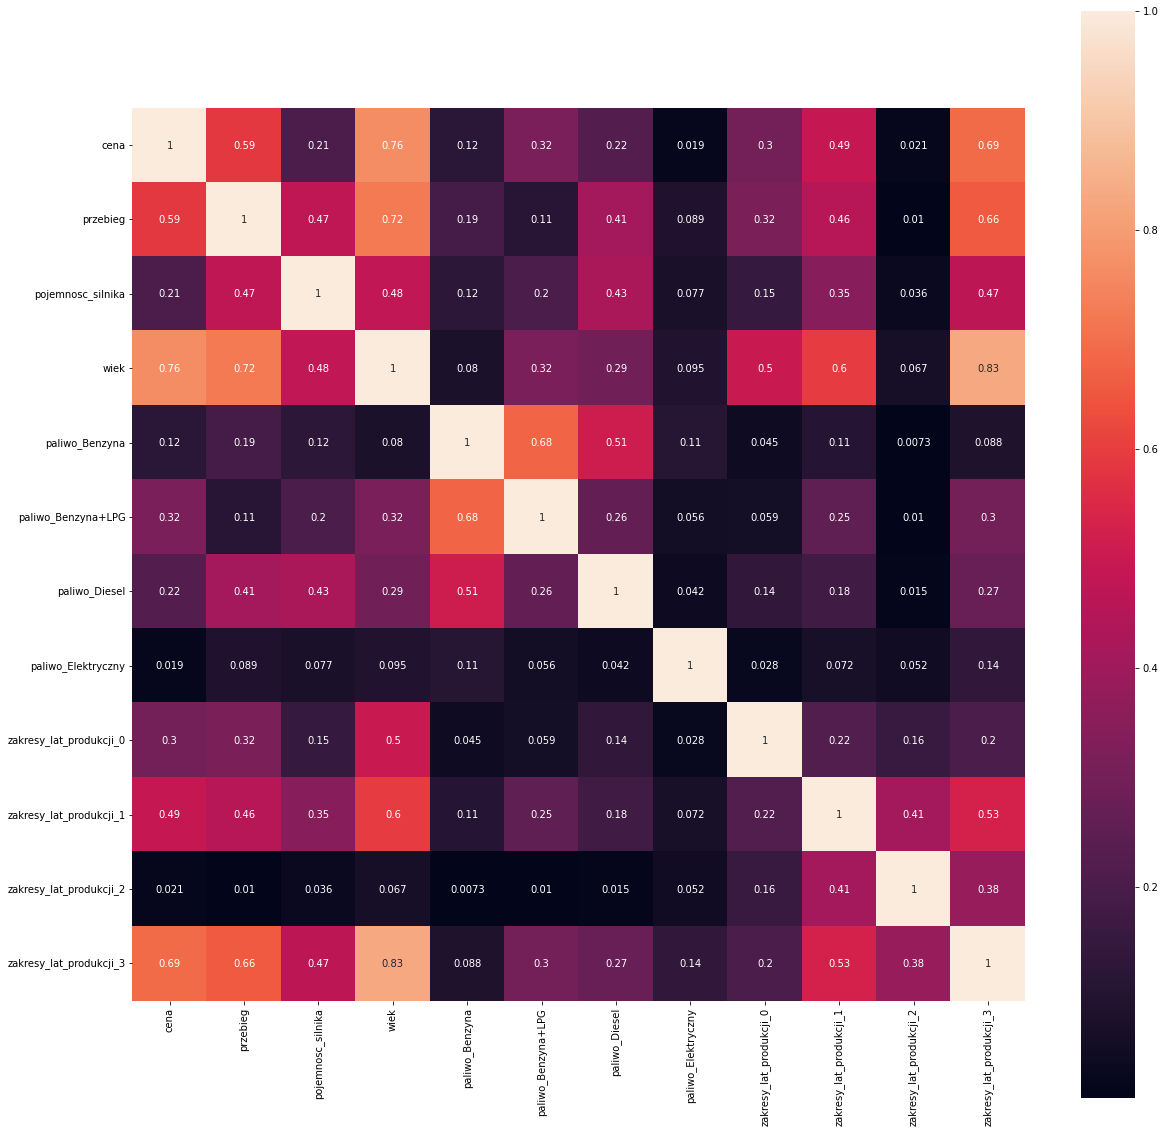

In [ ]:
# sprawdzenie korelacji między zmiennymi - całkowita
korelacja = dane_modelowanie5.corr().abs()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(korelacja, square = True, annot = True);

In [ ]:
# zdefiniowanie macierzy do filtrowania
macierz_filter = np.triu(np.ones(korelacja.shape), k=1).astype(np.bool)

# wybranie górnej części trójkąta w macierzy korelacji
gorny_trojkat = korelacja.where(macierz_filter)

# zdefiniowanie indeksów kolumn o korelacji powyżej 0.9
indeks_mocna_korelacja = [kolumna for kolumna in gorny_trojkat.columns if any(gorny_trojkat[kolumna] > 0.8)]
print(indeks_mocna_korelacja)

['zakresy_lat_produkcji_3']


<ipython-input-38-601eea0c6fdd>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
dane_modelowanie5.drop(columns=indeks_mocna_korelacja, inplace=True)

In [ ]:
dane_modelowanie5.to_csv("dane_modelowanie5.csv", index=False)

In [2]:

dane_modelowanie5 = pd.read_csv("dane_modelowanie5.csv")

In [3]:
# tworzenie zbiorów
X = dane_modelowanie5.drop(columns = ["cena"])
y = dane_modelowanie5["cena"]

# tworzenie zbiorów uczący i testowy
X_uczacy, X_testowy, y_uczacy, y_testowy = model_selection.train_test_split(X, 
                                                                            y.values, 
                                                                            test_size = .2, 
                                                                            random_state = 2020)

In [ ]:
X_uczacy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 737 to 869
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   przebieg                 1276 non-null   int64  
 1   pojemnosc_silnika        1276 non-null   float64
 2   wiek                     1276 non-null   int64  
 3   paliwo_Benzyna           1276 non-null   uint8  
 4   paliwo_Benzyna+LPG       1276 non-null   uint8  
 5   paliwo_Diesel            1276 non-null   uint8  
 6   paliwo_Elektryczny       1276 non-null   uint8  
 7   zakresy_lat_produkcji_0  1276 non-null   uint8  
 8   zakresy_lat_produkcji_1  1276 non-null   uint8  
 9   zakresy_lat_produkcji_2  1276 non-null   uint8  
dtypes: float64(1), int64(2), uint8(7)
memory usage: 48.6 KB


In [6]:
# standaryzowanie cech objaśniających
standaryzacja = preprocessing.StandardScaler()
fit_stand = standaryzacja.fit(X_uczacy)
X_uczacy_stand = fit_stand.transform(X_uczacy)
X_testowy_stand = fit_stand.transform(X_testowy)



In [ ]:
#wyuczenie modelu


In [7]:
# przygotowanie modelu Regresji Liniowej
model_rl = linear_model.LinearRegression()
model_rl.fit(X_uczacy_stand, y_uczacy)

LinearRegression()

In [10]:
# predykcja
print("Predykcja:", model_rl.predict([X_testowy_stand[1]]))
print("Wartość rzeczywista:", y_testowy[1])
print("Odchylenie przedykcji:", ((model_rl.predict([X_testowy_stand[1]])-y_testowy[1])/model_rl.predict([X_testowy_stand[1]]))*100, "%")

Predykcja: [54310.45054589]
Wartość rzeczywista: 61900
Odchylenie przedykcji: [-13.97438132] %


In [12]:

#Mean Squared Error (MSE) - błąd średniokwadratowy na całym zbiorze testowym
predykcja_model_rl = model_rl.predict(X_testowy_stand)
rl_mse = metrics.mean_squared_error(y_testowy, predykcja_model_rl)
print("MSE - LinearRegression: ", rl_mse)

#odchylenia średniej kwadradowej od wartości rzeczywistej 
# Root Mean Square Error (RMSE)
rl_rmse = np.sqrt(rl_mse)
print("RMSE - LinearRegression: ", rl_rmse)

MSE - LinearRegression:  157003091.5121968
RMSE - LinearRegression:  12530.087450301247


In [13]:
# przygotowanie modelu DecisionTreeRegressor()
model_dtr = tree.DecisionTreeRegressor()
model_dtr.fit(X_uczacy_stand, y_uczacy)

# obliczenie Mean Squared Error (MSE) - błąd średniokwadratowy na całym zbiorze testowym
predykcja_model_dtr = model_dtr.predict(X_testowy_stand)
dtr_mse = metrics.mean_squared_error(y_testowy, predykcja_model_dtr)
print("MSE - DecisionTreeRegressor: ", dtr_mse)

# obliczenie odchylenia średniej kwadradowej od wartości rzeczywistej 
# Root Mean Square Error (RMSE) - pierwiastek błędu średniokwadratowego
dtr_rmse = np.sqrt(dtr_mse)
print("RMSE - DecisionTreeRegressor: ", dtr_rmse) 

MSE - DecisionTreeRegressor:  249791382.36521176
RMSE - DecisionTreeRegressor:  15804.789855142388


In [ ]:
#walidacja modelu

In [14]:

standaryzacja = preprocessing.StandardScaler()
algo = linear_model.LinearRegression()
parametr = pipeline.make_pipeline(standaryzacja, algo)

# zdefiniowanie metody walidacji modelu
walidacja = model_selection.KFold(n_splits=10, shuffle=True, random_state=2020)

In [15]:
# krzyżowa walidacja modelu
neg_MSE = model_selection.cross_val_score(parametr, 
                                                    X_uczacy,
                                                    y_uczacy,
                                                    cv = walidacja,
                                                    scoring = "neg_mean_squared_error",
                                                    n_jobs = -1)

RMSE = np.sqrt(-neg_MSE)
print("Średnia wartość RMSE- LinearRegression: ", RMSE.mean())
print("Mediana wartość RMSE - LinearRegression: ", np.median(RMSE))
print("Odchylenie standardowe RMSE - LinearRegression: ", RMSE.std())

Średnia wartość RMSE- LinearRegression:  11931.231244161481
Mediana wartość RMSE - LinearRegression:  12111.392533394774
Odchylenie standardowe RMSE - LinearRegression:  1110.1771630149526


In [16]:
#DecisionTreeRegressor()
standaryzacja = preprocessing.StandardScaler()
algo = tree.DecisionTreeRegressor(random_state=2020)
parametr = pipeline.make_pipeline(standaryzacja, algo)
walidacja = model_selection.KFold(n_splits=10, shuffle=True, random_state=2020)
neg_MSE_dtr = model_selection.cross_val_score(parametr, 
                                                        X_uczacy,
                                                        y_uczacy,
                                                        cv = walidacja,
                                                        scoring = "neg_mean_squared_error",
                                                        n_jobs = -1)


RMSE_dtr = np.sqrt(-neg_MSE_dtr)

print("Średnia wartość RMSE - DecisionTreeRegressor: ", RMSE_dtr.mean())
print("Mediana wartość RMSE - DecisionTreeRegressor: ", np.median(RMSE_dtr))
print("Odchylenie standardowe RMSE - DecisionTreeRegressor: ", RMSE_dtr.std())

Średnia wartość RMSE - DecisionTreeRegressor:  15263.570361572192
Mediana wartość RMSE - DecisionTreeRegressor:  15339.522661349516
Odchylenie standardowe RMSE - DecisionTreeRegressor:  1367.0064360415622


In [17]:
#RandomForestRegressor()

standaryzacja = preprocessing.StandardScaler()
algo = ensemble.RandomForestRegressor(random_state=2020)
parametr = pipeline.make_pipeline(standaryzacja, algo)
walidacja = model_selection.KFold(n_splits=10, shuffle=True, random_state=2020)

neg_MSE_rfr = model_selection.cross_val_score(parametr, 
                                                        X_uczacy,
                                                        y_uczacy,
                                                        cv = walidacja,
                                                        scoring = "neg_mean_squared_error",
                                                        n_jobs = -1)

RMSE_rfr = np.sqrt(-neg_MSE_rfr)

# podsumowanie dla RandomForestRegressor
print("Średnia wartość RMSE - RandomForestRegressor: ", RMSE_rfr.mean())
print("Mediana wartość RMSE - RandomForestRegressor: ", np.median(RMSE_rfr))
print("Odchylenie standardowe RMSE - RandomForestRegressor: ", RMSE_rfr.std())

Średnia wartość RMSE - RandomForestRegressor:  12545.648845099226
Mediana wartość RMSE - RandomForestRegressor:  12601.319011235893
Odchylenie standardowe RMSE - RandomForestRegressor:  1247.1818987136423


In [18]:
#optymalizacja
#RandomForestRegressor


# ładniejsze pokazywanie dostępnych parametrów modelu
algo = ensemble.RandomForestRegressor()
pprint(algo.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [19]:
#GridSearchCV()

# wybranie metody modelowania - RandomForestRegressor()
algo = ensemble.RandomForestRegressor(random_state=2020)

random_param = [{
                      "n_estimators": [20, 50, 100],
                      "min_samples_split": [2, 5, 20, 50],
                      "max_depth": [3, 10, None]
                      },
                     
                     {
                      "bootstrap": [False, True], 
                      "n_estimators": [10, 100, 300, 500, 1000],
                      "min_samples_leaf": [1, 3, 5],
                      "max_features": ["auto", "sqrt"]
                      }]

# zdefiniowanie metody walidacji modelu
walidacja = model_selection.KFold(n_splits=10, shuffle=True, random_state=2020)

# konfiguracja procesu przetestowania siatki parametrów
konfiguracja = pipeline.make_pipeline(preprocessing.StandardScaler(), 
                                              model_selection.GridSearchCV(estimator = algo, 
                                                                           param_grid = random_param,
                                                                           cv = walidacja,
                                                                           verbose = 5, #częstość wyświetlenia informacji przy modelowaniu
                                                                           scoring = "neg_mean_squared_error",
                                                                           n_jobs = -1))
# nauczanie modelu
konfiguracja.fit(X_uczacy, y_uczacy)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
                              estimator=RandomForestRegressor(random_state=2020),
                              n_jobs=-1,
                              param_grid=[{'max_depth': [3, 10, None],
                                           'min_samples_split': [2, 5, 20, 50],
                                           'n_estimators': [20, 50, 100]},
                                          {'bootstrap': [False, True],
                                           'max_features': ['auto', 'sqrt'],
                                           'min_samples_leaf': [1, 3, 5],
                                           'n_estimators': [10, 100, 300, 500,
                                                            1000]}],
                              scoring='neg_mean_squared_error', verbose=5))])

In [20]:
wyniki_procesu = konfiguracja.named_steps["gridsearchcv"]
wyniki_procesu

GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=RandomForestRegressor(random_state=2020), n_jobs=-1,
             param_grid=[{'max_depth': [3, 10, None],
                          'min_samples_split': [2, 5, 20, 50],
                          'n_estimators': [20, 50, 100]},
                         {'bootstrap': [False, True],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [1, 3, 5],
                          'n_estimators': [10, 100, 300, 500, 1000]}],
             scoring='neg_mean_squared_error', verbose=5)

In [21]:
wyniki_procesu.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 300}

In [22]:
wyniki_procesu.best_estimator_

RandomForestRegressor(max_features='sqrt', min_samples_leaf=5, n_estimators=300,
                      random_state=2020)

In [23]:
## wykorzystanie najlepszegi modelu (na zbiorze uczacym)
najlepszy_model_rfr = wyniki_procesu.best_estimator_
predykcja  = najlepszy_model_rfr.predict(X_testowy_stand)

# wyliczenie metryk
najlepszy_model_rfr_mse = metrics.mean_squared_error(y_testowy, predykcja)
print("MSE dla najlepszego modelu - RandomForestRegressor: ", najlepszy_model_rfr_mse)

najlepszy_model_rfr_rmse = np.sqrt(najlepszy_model_rfr_mse)
print("RMSE dla najlepszego modelu - RandomForestRegressor: ", najlepszy_model_rfr_rmse)

MSE dla najlepszego modelu - RandomForestRegressor:  142524884.3701357
RMSE dla najlepszego modelu - RandomForestRegressor:  11938.378632382863


In [24]:
# pobranie wynikow testu - wskaźnik MSE
MSE_results = wyniki_procesu.cv_results_['mean_test_score']
# wyliczenie wskaźnika RMSE
RMSE_results = np.sqrt(-MSE_results)

# pobranie hyperparametrów modelu
parametry = wyniki_procesu.cv_results_['params']

# podsumowanie RMSE i hyperparametrów dla RandomForestRegressor
for RMSE, parametry in zip(RMSE_results, parametry):
  print(RMSE, parametry)

11854.544809945864 {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 20}
11823.054805654041 {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
11826.606527168735 {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
11853.38702176142 {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 20}
11822.58376724429 {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}
11826.365477263356 {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
11854.043209127576 {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 20}
11823.364763697547 {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
11826.732001218094 {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
11854.043209127576 {'max_depth': 3, 'min_samples_split': 50, 'n_estimators': 20}
11823.709029198128 {'max_depth': 3, 'min_samples_split': 50, 'n_estimators': 50}
11827.034081644357 {'max_depth': 3, 'min_samples_split': 50, 'n_estimators': 100}
12249.383441303564 {'max_depth':

In [34]:
import plotly.express as px
istotnosc_cech = pd.DataFrame(dict(istotnosc=wyniki_procesu.best_estimator_.feature_importances_, 
                                          cecha=X_uczacy.columns.values)).sort_values(by="istotnosc", ascending=False)

# wizualizacja istotności cech
px.pie(istotnosc_cech, 
       values= "istotnosc", 
       names = "cecha", 
       title = "Względna istotność cech wykorzystywanych w modelu RandomForestRegressor")

In [36]:
# wybraniemało istotnych cech
dolna_granica_q1 = np.percentile(istotnosc_cech["istotnosc"], [20])
print("Względna granica istotności: ", dolna_granica_q1)

# wyfiltrowanie cech względnie mało istotnych
cechy_maloistotne = istotnosc_cech[ istotnosc_cech["istotnosc"] < float(dolna_granica_q1) ]
cechy_maloistotne

Względna granica istotności:  [0.00958196]


,istotnosc,cecha
5,0.007449,paliwo_Diesel
6,0.000336,paliwo_Elektryczny


In [38]:
# tworzenie zbiorów po wyeliminowaniu nieistotnych zmiennych
X_optimal = dane_modelowanie5.drop(columns = ["cena"])
X_optimal.drop(columns = cechy_maloistotne["cecha"].tolist(), inplace = True)
y_optimal = dane_modelowanie5["cena"]
X_uczacy_optimal, X_testowy_optimal, y_uczacy_optimal, y_testowy_optimal = model_selection.train_test_split(X_optimal, 
                                                                                                            y_optimal.values, 
                                                                                                            test_size = .2, 
                                                                                                            random_state = 2020)
# standaryzacja
standaryzacja = preprocessing.StandardScaler()
fit_stand_optimal = standaryzacja.fit(X_uczacy_optimal)
X_uczacy_stand_optimal = fit_stand_optimal.transform(X_uczacy_optimal)
X_testowy_stand_optimal = fit_stand_optimal.transform(X_testowy_optimal)

In [39]:
#modelowanie nr 2

#GridSearchCV()

# wybranie metody modelowania - RandomForestRegressor()
algo = ensemble.RandomForestRegressor(random_state=2020)

random_param2 = [{
                      "n_estimators": [20, 50, 100],
                      "subsample": np.linspace(0.5, 1, 101),
                      "max_depth": [3, 10, None],
                      "gamma": np.linspace(0, 0.4, 6),
                  "colsample_bylevel": np.linspace(0.6, 1, 11)
                      },
                     
                     {
                      "bootstrap": [False, True], 
                      "n_estimators": [10, 100, 300, 500, 1000],
                      "min_samples_leaf": [1, 3, 5],
                      "max_features": ["auto", "sqrt"]
                      }]

  

# zdefiniowanie metody walidacji modelu
walidacja = model_selection.KFold(n_splits=10, shuffle=True, random_state=2020)

# konfiguracja procesu przetestowania siatki parametrów
konfiguracja2 = pipeline.make_pipeline(preprocessing.StandardScaler(), 
                                              model_selection.GridSearchCV(estimator = algo, 
                                                                           param_grid = random_param,
                                                                           cv = walidacja,
                                                                           verbose = 5, #częstość wyświetlenia informacji przy modelowaniu
                                                                           scoring = "neg_mean_squared_error",
                                                                           n_jobs = -1))
# nauczanie modelu
konfiguracja2.fit(X_uczacy_optimal, y_uczacy_optimal)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
                              estimator=RandomForestRegressor(random_state=2020),
                              n_jobs=-1,
                              param_grid=[{'max_depth': [3, 10, None],
                                           'min_samples_split': [2, 5, 20, 50],
                                           'n_estimators': [20, 50, 100]},
                                          {'bootstrap': [False, True],
                                           'max_features': ['auto', 'sqrt'],
                                           'min_samples_leaf': [1, 3, 5],
                                           'n_estimators': [10, 100, 300, 500,
                                                            1000]}],
                              scoring='neg_mean_squared_error', verbose=5))])

In [40]:
wyniki_procesu2 = konfiguracja2.named_steps["gridsearchcv"]
wyniki_procesu2

GridSearchCV(cv=KFold(n_splits=10, random_state=2020, shuffle=True),
             estimator=RandomForestRegressor(random_state=2020), n_jobs=-1,
             param_grid=[{'max_depth': [3, 10, None],
                          'min_samples_split': [2, 5, 20, 50],
                          'n_estimators': [20, 50, 100]},
                         {'bootstrap': [False, True],
                          'max_features': ['auto', 'sqrt'],
                          'min_samples_leaf': [1, 3, 5],
                          'n_estimators': [10, 100, 300, 500, 1000]}],
             scoring='neg_mean_squared_error', verbose=5)

In [41]:
wyniki_procesu2.best_params_

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 1000}

In [42]:
wyniki_procesu2.best_estimator_

RandomForestRegressor(max_features='sqrt', min_samples_leaf=5,
                      n_estimators=1000, random_state=2020)

In [45]:
## wykorzystanie najlepszegi modelu (na zbiorze uczacym)
najlepszy_model_rfr2 = wyniki_procesu2.best_estimator_
predykcja2 = najlepszy_model_rfr2.predict(X_testowy_stand_optimal)

# wyliczenie metryk
najlepszy_model_rfr_mse2 = metrics.mean_squared_error(y_testowy_optimal, predykcja2)
print("MSE dla najlepszego modelu - RandomForestRegressor: ", najlepszy_model_rfr_mse)

najlepszy_model_rfr_rmse2 = np.sqrt(najlepszy_model_rfr_mse2)
print("RMSE dla najlepszego modelu - RandomForestRegressor: ", najlepszy_model_rfr_rmse2)

MSE dla najlepszego modelu - RandomForestRegressor:  142524884.3701357
RMSE dla najlepszego modelu - RandomForestRegressor:  11958.416542264198


In [47]:
# pobranie wynikow testu - wskaźnik MSE
MSE_results = wyniki_procesu2.cv_results_['mean_test_score']
# wyliczenie wskaźnika RMSE
RMSE_results = np.sqrt(-MSE_results)

# pobranie hyperparametrów modelu
parametry = wyniki_procesu2.cv_results_['params']

# podsumowanie RMSE i hyperparametrów dla RandomForestRegressor
for RMSE, parametry in zip(RMSE_results, parametry):
  print(RMSE, parametry)

11842.812116554434 {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 20}
11815.40358349157 {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
11818.672598007159 {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
11842.812116554434 {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 20}
11815.40358349157 {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50}
11818.672598007159 {'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}
11845.8674160552 {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 20}
11817.090430992408 {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
11819.38369648053 {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
11845.8674160552 {'max_depth': 3, 'min_samples_split': 50, 'n_estimators': 20}
11817.434140573494 {'max_depth': 3, 'min_samples_split': 50, 'n_estimators': 50}
11819.604898810932 {'max_depth': 3, 'min_samples_split': 50, 'n_estimators': 100}
12287.333445973038 {'max_depth': 10, 